### 1、使用多种方法对boston数据集进行回归，画出回归图像，并比较多种回归方法的效果

`
from sklearn.datasets import load_boston
boston = load_boston()
x = boston.data
y = boston.target
`

In [139]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,Ridge,LinearRegression

In [140]:
from sklearn.datasets import load_boston
boston = load_boston()
x = boston.data
y = boston.target
f_n = boston.feature_names

In [141]:
display(x.shape,y.shape)

(506, 13)

(506,)

In [142]:
bs = DataFrame(data=x,columns=f_n)

In [143]:
bs.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [144]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [145]:
linear = LinearRegression()
linear.fit(x_train,y_train).score(x_train,y_train)

0.7390748371571005

In [146]:
ridge = Ridge()
ridge.fit(x_train,y_train).score(x_train,y_train)

0.7375588651874647

In [147]:
lasso = Lasso()
lasso.fit(x_train,y_train).score(x_train,y_train)

0.6799625547406747

In [148]:
y_linear = linear.predict(x_test)
y_ridge = ridge.predict(x_test)
y_lasso = lasso.predict(x_test)

In [149]:
display(linear.score(x_test,y_test),
        ridge.score(x_test,y_test),
        lasso.score(x_test,y_test))

0.7406300716247348

0.729988908752203

0.6226006928545511

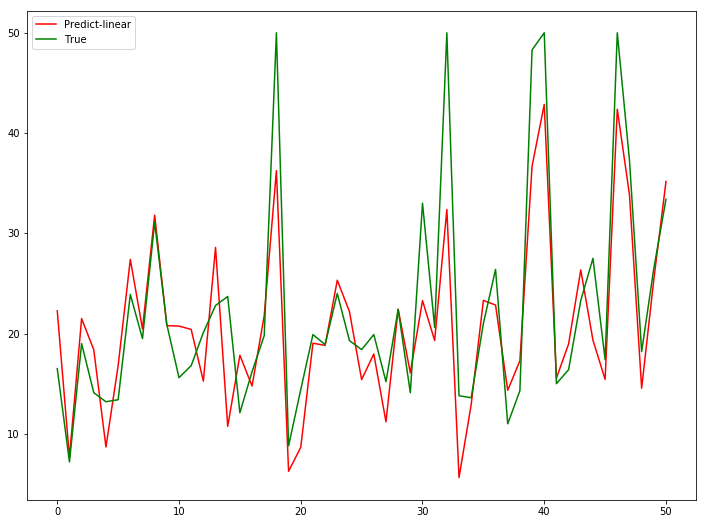

In [150]:
plt.figure(figsize=(12,9))
plt.plot(y_linear,label='Predict-linear',c='r',)
plt.plot(y_test,label='True',c='g')
plt.legend()

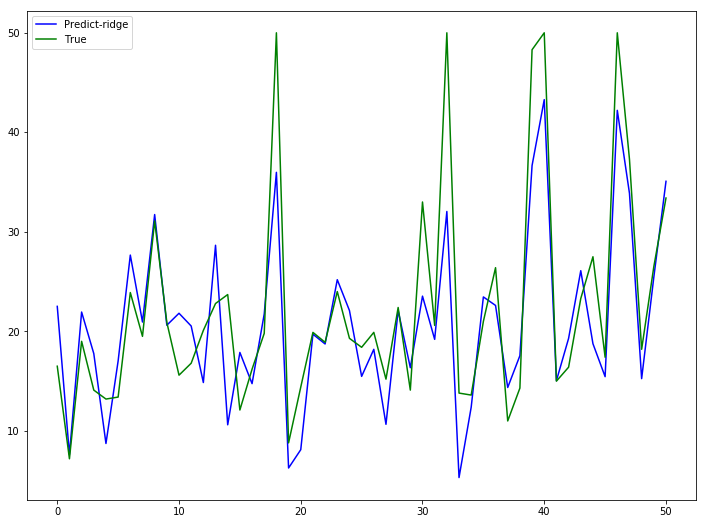

In [151]:
plt.figure(figsize=(12,9))
plt.plot(y_ridge,label='Predict-ridge',c='b')
plt.plot(y_test,label='True',c='g')
plt.legend()

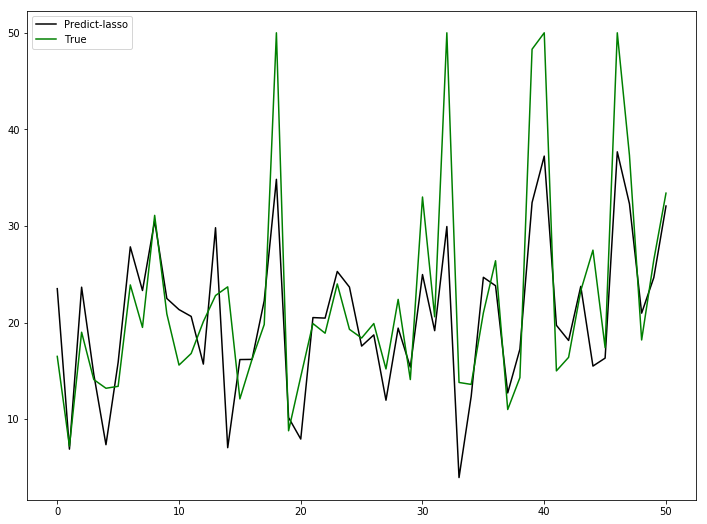

In [152]:
plt.figure(figsize=(12,9))
plt.plot(y_lasso,label='Predict-lasso',c='black')
plt.plot(y_test,label='True',c='g')
plt.legend()

Text(0.5,1,'Predict-lasso')

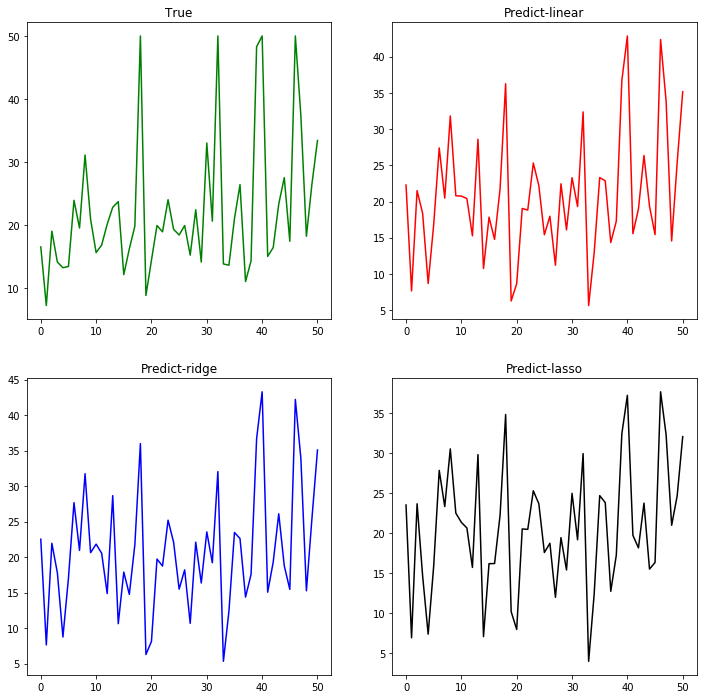

In [153]:
plt.figure(figsize=(2* 6, 2* 6))
axes1 = plt.subplot(221)
axes2 = plt.subplot(222)
axes3 = plt.subplot(223)
axes4 = plt.subplot(224)
axes1.plot(y_test,c='g')
axes2.plot(y_linear,c='r',)
axes3.plot(y_ridge,c='b')
axes4.plot(y_lasso,c='black')
axes1.set_title('True')
axes2.set_title('Predict-linear')
axes3.set_title('Predict-ridge')
axes4.set_title('Predict-lasso')

### 2、预测鲍鱼的年龄
abalone.txt

In [154]:
ab = pd.read_csv('abalone.txt',sep='\t',header=None)
ab.head()

,0,1,2,3,4,5,6,7,8
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [155]:
data = ab.drop(columns=[0,8])
data.shape

(4177, 7)

In [156]:
target = ab[8].values
target

array([15,  7,  9, ...,  9, 10, 12], dtype=int64)

### alpha值

In [157]:
ridge.coef_

array([-1.08617848e-01,  4.29978827e-02, -4.27942685e-02,  2.48822208e+00,
       -8.78471586e+00,  3.51815538e+00, -5.80508512e-03, -1.33268822e+00,
        2.97023271e-01, -1.31762053e-02, -8.74036022e-01,  7.85007586e-03,
       -5.62878261e-01])

In [158]:
X = 1 / (np.arange(1,11) + np.arange(0,10).reshape(-1,1))
y = np.arange(0,10)

In [159]:
alphas = np.logspace(-10, -2, 200)

In [160]:
coefs = []
ridge = Ridge()
# 进行200次训练.
for alpha in alphas:
    ridge.set_params(alpha=alpha)
    # 再训练
    ridge.fit(X,y)
    # 训练完之后,获取系数
    coefs.append(ridge.coef_)

In [161]:
coefs

[array([  -22.49781686,   416.34710042, -1294.11581331,   182.98485244,
         1021.96263317,  1006.82879603,   501.21126287,  -198.83380216,
         -922.59243818, -1586.47323876]),
 array([  -21.93552178,   408.7380518 , -1277.6394063 ,   187.86428818,
         1012.43432309,   992.07588759,   489.86066219,  -201.46158706,
         -914.06776699, -1566.28605908]),
 array([  -21.32954554,   400.481829  , -1259.41543252,   192.34332703,
         1001.86745039,   976.59020113,   478.3129308 ,  -203.83111108,
         -904.99148824, -1545.40676175]),
 array([  -20.67892738,   391.56736111, -1239.4320939 ,   196.45795674,
          990.25616423,   960.33154675,   466.52421934,  -205.96326717,
         -895.3448686 , -1523.76940232]),
 array([  -19.98289684,   381.98603614, -1217.68223914,   200.2410439 ,
          977.5971452 ,   943.2656085 ,   454.45577098,  -207.8771766 ,
         -885.11231334, -1501.31643536]),
 array([  -19.24091959,   371.73237022, -1194.1651166 ,   203.72259087

Text(0.5,1,'relationship of alphas and coefficients')

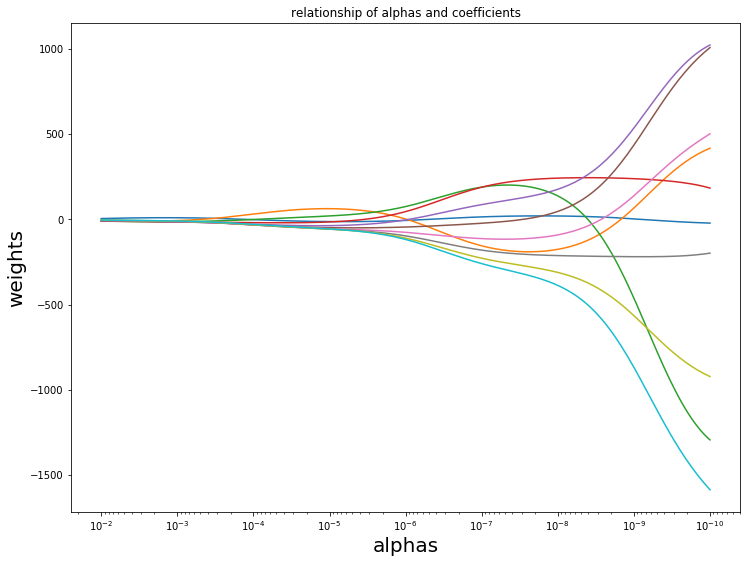

In [162]:
# 画出alpha和coef之间的关系
plt.figure(figsize=(12,9))
# 获取当前轴面 get current axes 
axes = plt.gca()
axes.plot(alphas, coefs)
# 换成使用对数坐标刻度
axes.set_xscale('log')
# 翻转X的刻度
axes.set_xlim(axes.get_xlim()[::-1])
# axes.get_xlim()
axes.set_xlabel('alphas', fontdict=dict(fontsize=20))
axes.set_ylabel('weights', fontdict=dict(fontsize=20))
axes.set_title('relationship of alphas and coefficients')

In [163]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.01)

In [164]:
linear = LinearRegression()
linear.fit(x_train,y_train).score(x_train,y_train)

0.5290960094121213

In [165]:
ridge = Ridge(alpha = 0.0001)
ridge.fit(x_train,y_train).score(x_train,y_train)

0.5290960093345487

In [166]:
lasso = Lasso(alpha = 0.0001)
lasso.fit(x_train,y_train).score(x_train,y_train)

0.5290807164174216

In [167]:
y_linear = linear.predict(x_test)
y_ridge = ridge.predict(x_test)
y_lasso = lasso.predict(x_test)

In [168]:
display(linear.score(x_test,y_test),
        ridge.score(x_test,y_test),
        lasso.score(x_test,y_test))

0.3092611368184204

0.309257403490086

0.3073828677788747

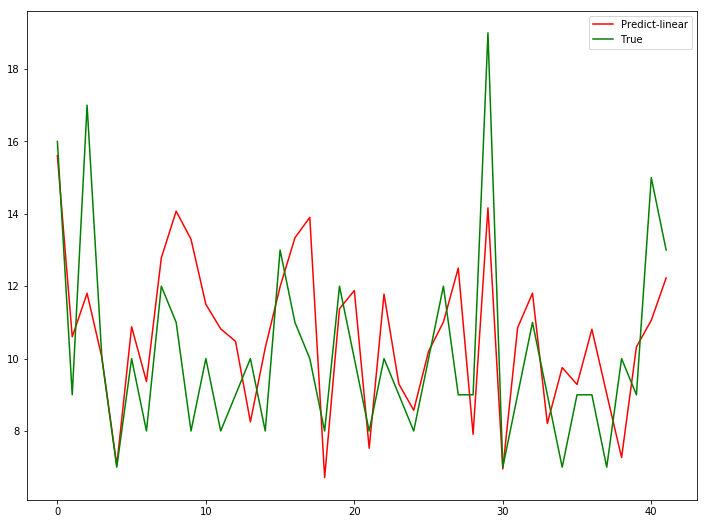

In [169]:
plt.figure(figsize=(12,9))
plt.plot(y_linear,label='Predict-linear',c='r')
plt.plot(y_test,label='True',c='g')
plt.legend()

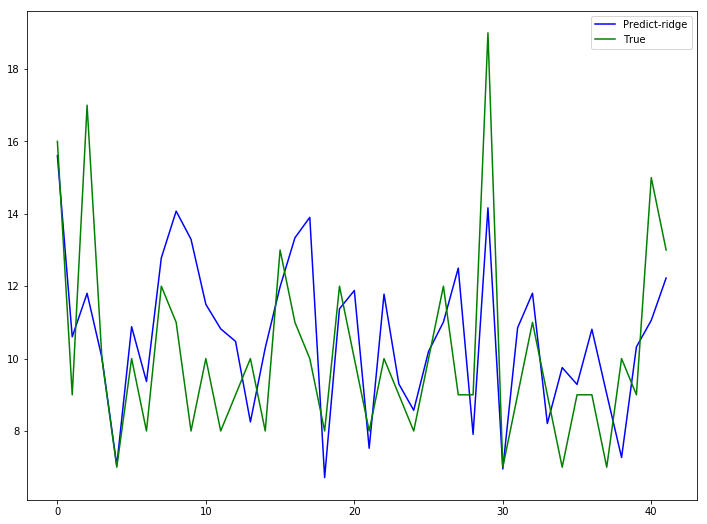

In [170]:
plt.figure(figsize=(12,9))
plt.plot(y_ridge,label='Predict-ridge',c='b')
plt.plot(y_test,label='True',c='g')
plt.legend()

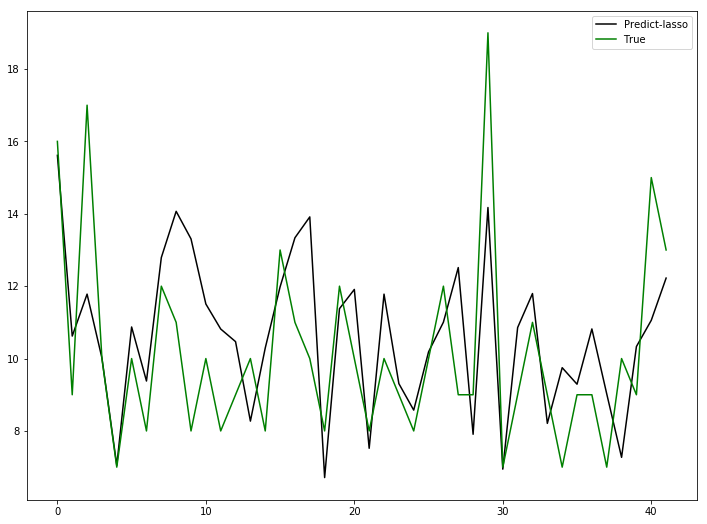

In [171]:
plt.figure(figsize=(12,9))
plt.plot(y_lasso,label='Predict-lasso',c='black')
plt.plot(y_test,label='True',c='g')
plt.legend()

Text(0.5,1,'Predict-lasso')

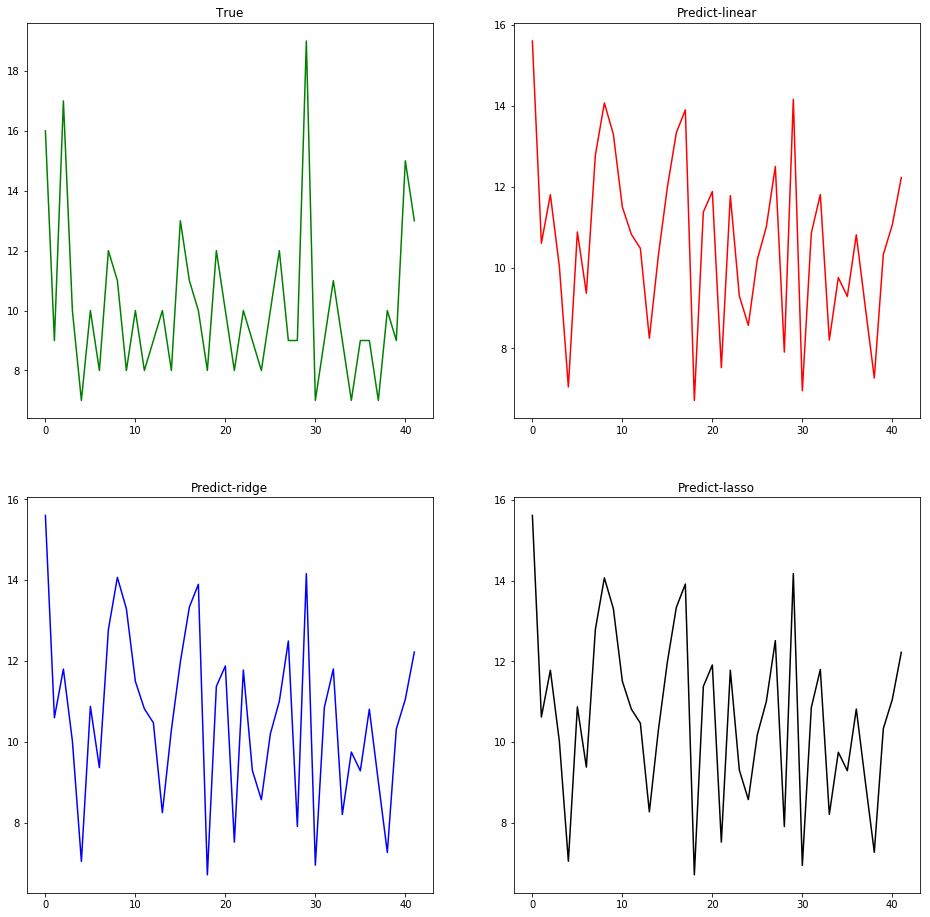

In [172]:
plt.figure(figsize=(2* 8, 2* 8))
axes1 = plt.subplot(221)
axes2 = plt.subplot(222)
axes3 = plt.subplot(223)
axes4 = plt.subplot(224)
axes1.plot(y_test,c='g')
axes2.plot(y_linear,c='r',)
axes3.plot(y_ridge,c='b')
axes4.plot(y_lasso,c='black')
axes1.set_title('True')
axes2.set_title('Predict-linear')
axes3.set_title('Predict-ridge')
axes4.set_title('Predict-lasso')